In [1]:
# stdlib imports
import os
from pathlib import Path
from datetime import timedelta

# external imports
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

In [2]:
RUNS = ['WCP', 'LEJOG']

# length of each run (miles)
LENGTHS = {
    'WCP': 870,
    'LEJOG': 874
}

# target lengths
TARGETS = [365,350,300,250,200,150]

# how many miles should we run each day for the given target?
RATES = {}
for run in RUNS:
    RATES[run] = {}
    for target in TARGETS:
        RATES[run][target] = LENGTHS[run]/target

In [3]:
# all the data is in the dropbox
DATA_FILE = Path.home() / 'Dropbox' / 'home' / 'shared' / 'martin' / 'WCP.xlsx'
DATA_FILE

PosixPath('/Users/martinchorley/Dropbox/home/shared/martin/WCP.xlsx')

In [4]:
OUTPUT_DIR = Path.cwd() / 'src'
OUTPUT_DIR

PosixPath('/Users/martinchorley/Desktop/wcp-lejog-analysis/src')

In [5]:
# let's read in the run data
run_data = pd.read_excel(DATA_FILE, sheet_name=['WCP', 'LEJOG'], header=1)
run_data

{'WCP':      Day       Date  Mileage  Cumulative  Daily Rate  Remaining  Pace Required
 0      1 2020-06-15     0.00        0.00    0.000000     870.00       2.390110
 1      2 2020-06-16     6.29        6.29    3.145000     863.71       2.379366
 2      3 2020-06-17     0.00        6.29    2.096667     863.71       2.385939
 3      4 2020-06-18     3.71       10.00    2.500000     860.00       2.382271
 4      5 2020-06-19     2.85       12.85    2.570000     857.15       2.380972
 ..   ...        ...      ...         ...         ...        ...            ...
 361  362 2021-06-11      NaN      203.19    0.561298     666.81     222.270000
 362  363 2021-06-12      NaN      203.19    0.559752     666.81     333.405000
 363  364 2021-06-13      NaN      203.19    0.558214     666.81     666.810000
 364  365 2021-06-14      NaN      203.19    0.556685     666.81            NaN
 365  366 2021-06-15      NaN      203.19    0.555164     666.81            NaN
 
 [366 rows x 7 columns],
 'LEJO

In [6]:
# drop the days we didn't run (or haven't run yet)
for run in RUNS:
    run_data[run] = run_data[run].dropna()
    
for run, r in run_data.items():
    print(run)
    display(r)

WCP


,Day,Date,Mileage,Cumulative,Daily Rate,Remaining,Pace Required
0,1,2020-06-15,0.00,0.00,0.000000,870.00,2.390110
1,2,2020-06-16,6.29,6.29,3.145000,863.71,2.379366
2,3,2020-06-17,0.00,6.29,2.096667,863.71,2.385939
3,4,2020-06-18,3.71,10.00,2.500000,860.00,2.382271
4,5,2020-06-19,2.85,12.85,2.570000,857.15,2.380972
...,...,...,...,...,...,...,...
63,64,2020-08-17,6.87,191.23,2.987969,678.77,2.255050
64,65,2020-08-18,0.00,191.23,2.942000,678.77,2.262567
65,66,2020-08-19,3.45,194.68,2.949697,675.32,2.258595
66,67,2020-08-20,0.00,194.68,2.905672,675.32,2.266174


LEJOG


,Day,Date,Mileage,Cumulative,Daily Rate,Remaining,Pace Required
0,1,2020-07-13,12.99,12.99,12.990000,861.01,2.365412
1,2,2020-07-14,0.00,12.99,6.495000,861.01,2.371928
2,3,2020-07-15,0.00,12.99,4.330000,861.01,2.378481
3,4,2020-07-16,6.45,19.44,4.860000,854.56,2.367202
4,5,2020-07-17,0.00,19.44,3.888000,854.56,2.373778
5,6,2020-07-18,3.12,22.56,3.760000,851.44,2.371699
6,7,2020-07-19,0.00,22.56,3.222857,851.44,2.378324
7,8,2020-07-20,9.37,31.93,3.991250,842.07,2.358739
8,9,2020-07-21,0.00,31.93,3.547778,842.07,2.365365
9,10,2020-07-22,4.58,36.51,3.651000,837.49,2.359127


In [7]:
# how many miles have we got left to do, and how many are we doing on average every day

CURRENT_RATES = {}
REMAINING = {}

for run in RUNS:
    last_run = run_data[run].iloc[-1]
    CURRENT_RATES[run] = last_run['Cumulative']/last_run['Day']
    REMAINING[run] = LENGTHS[run] - last_run['Cumulative']
    
print(CURRENT_RATES)
print(REMAINING)

{'WCP': 2.988088235294118, 'LEJOG': 3.0367499999999996}
{'WCP': 666.81, 'LEJOG': 752.53}


In [8]:
DAYS_TO_FINISH = {}
for run in RUNS:
    DAYS_TO_FINISH[run] = REMAINING[run] / CURRENT_RATES[run]
print(DAYS_TO_FINISH)

{'WCP': 223.1560608297652, 'LEJOG': 247.8076891413518}


In [9]:
PROJECTED_END = {}
for run in RUNS:
    first_run = run_data[run].iloc[0]
    start_date = first_run['Date']
    PROJECTED_END[run] = (start_date + timedelta(days=DAYS_TO_FINISH[run])).date()
    print('Predicted to finish {0} on {1}'.format(run, PROJECTED_END[run].strftime('%A %d %B %Y')))

Predicted to finish WCP on Sunday 24 January 2021
Predicted to finish LEJOG on Wednesday 17 March 2021


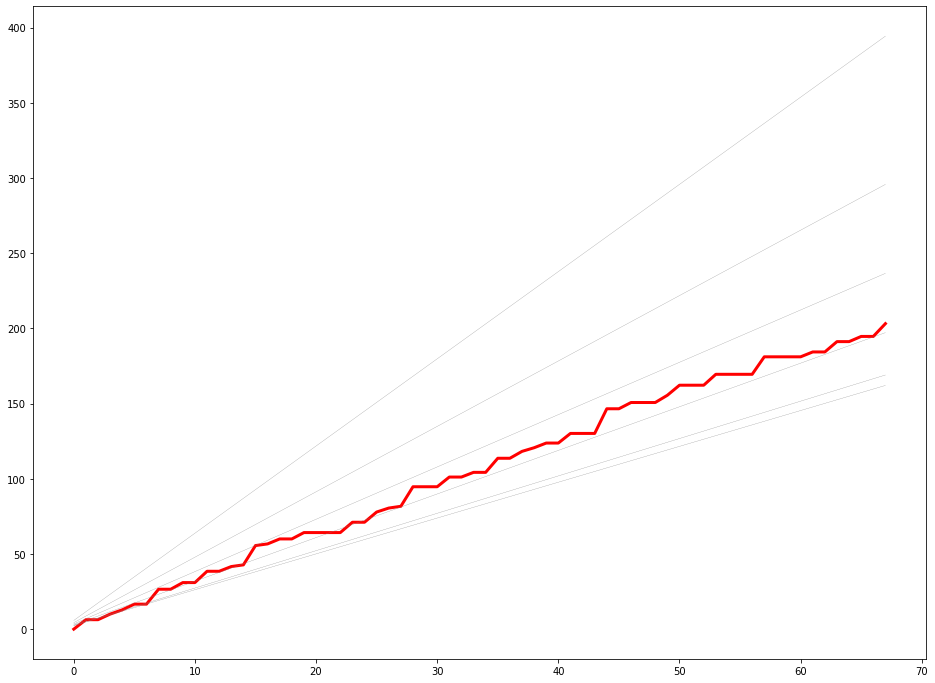

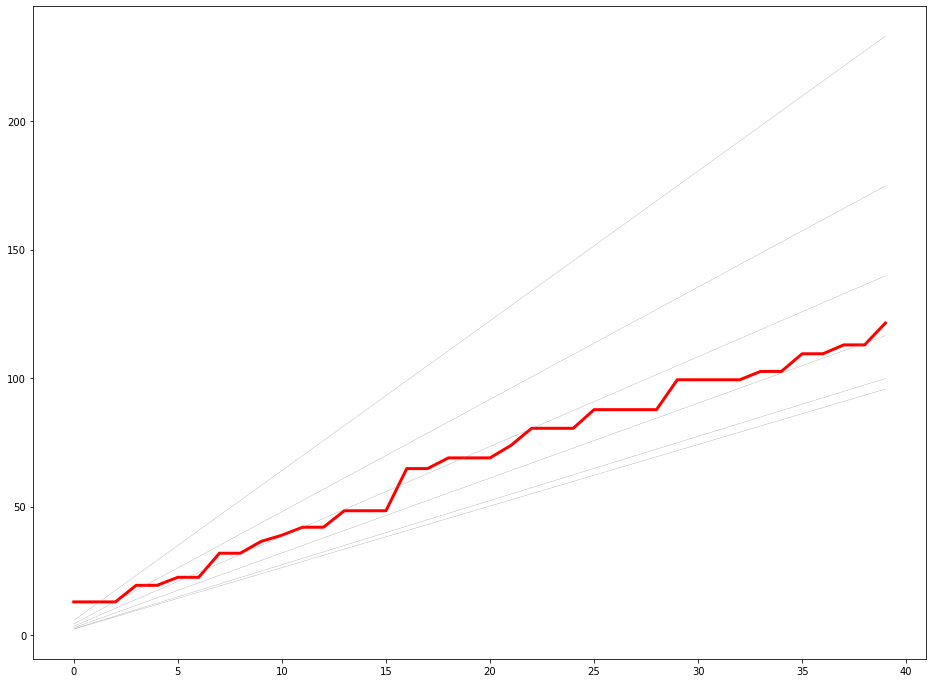

In [10]:
for run in RUNS:
    fig, ax = plt.subplots(figsize=[16,12])
    plt.plot(run_data[run]['Cumulative'], color='red', linewidth=3)
    for key, rate in RATES[run].items():
        plt.plot([rate*y for y in range(1,run_data[run].iloc[-1]['Day']+1)], label=key, linewidth=0.25, color='gray')

In [11]:
for run in RUNS:
    for key, rate in RATES[run].items():
        run_data[run][key] = run_data[run]['Day'] * rate
        
print(run_data)

for run in RUNS:
    with open(OUTPUT_DIR / '{}.csv'.format(run), 'w') as output_file:
        run_data[run][['Date', 'Cumulative']].to_csv(output_file)

{'WCP':     Day       Date  Mileage  Cumulative  Daily Rate  Remaining  Pace Required  \
0     1 2020-06-15     0.00        0.00    0.000000     870.00       2.390110   
1     2 2020-06-16     6.29        6.29    3.145000     863.71       2.379366   
2     3 2020-06-17     0.00        6.29    2.096667     863.71       2.385939   
3     4 2020-06-18     3.71       10.00    2.500000     860.00       2.382271   
4     5 2020-06-19     2.85       12.85    2.570000     857.15       2.380972   
..  ...        ...      ...         ...         ...        ...            ...   
63   64 2020-08-17     6.87      191.23    2.987969     678.77       2.255050   
64   65 2020-08-18     0.00      191.23    2.942000     678.77       2.262567   
65   66 2020-08-19     3.45      194.68    2.949697     675.32       2.258595   
66   67 2020-08-20     0.00      194.68    2.905672     675.32       2.266174   
67   68 2020-08-21     8.51      203.19    2.988088     666.81       2.245152   

           365     